In [1]:
# Licensed under a 3-clause BSD style license - see LICENSE.rst
"""Feupy Analysis ROI"""

'Feupy Analysis ROI'

# Feupy Analysis ROI Examples

This notebook demonstrates the usage of Feupy for setting up and analyzing a region of interest (ROI), generating catalogs, plotting ROI maps, and visualizing spectral energy distributions (SEDs).


In [2]:
# Required imports for the examples
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

from gammapy.utils.scripts import make_path

from feupy.analysis.config import ROIAnalysisConfig
from feupy.analysis.core import ROIAnalysis
from feupy.utils.coordinates import convert_skycoord_to_dict
from feupy.visualization.styles.markers import generate_catalog_markers
from feupy.visualization.roimap import ROIMapPlotter
from feupy.visualization.sed import SEDPlotter
from feupy.visualization import MY_MPL_STYLE

plt.style.use(make_path(MY_MPL_STYLE))

FileNotFoundError: [Errno 2] No such file or directory: '/home/phoenix/Coding/data/feupy-datasets/data/catalogs/veritas/models.yaml'

## Configure the Region of Interest (ROI)
Define the target position, radius, and energy range. Initialize and run the ROI analysis.

In [3]:
from feupy.catalog import FEUPY_CATALOG_REGISTRY

# Define the target position and energy range
# target_position = FEUPY_CATALOG_REGISTRY.get_cls('3PC')()[1].position
target_position = FEUPY_CATALOG_REGISTRY.get_cls('LHAASO')()[1].position.icrs

# Set up the ROI configuration
config_roi = ROIAnalysisConfig()
config_roi.roi = convert_skycoord_to_dict(target_position)
config_roi.roi.radius = 0.5 * u.deg
config_roi.energy_range.min = 0.5 * u.TeV

In [4]:
print(config_roi)

ROIAnalysisConfig

    general:
        log: {level: info, filename: null, filemode: null, format: null, datefmt: null}
        outdir: .
        n_jobs: 1
        datasets_file: null
        models_file: null
    roi: {frame: icrs, lon: 276.45 deg, lat: -13.45 deg, radius: 0.5 deg}
    energy_range: {min: 0.5 TeV, max: null}
    


In [5]:
# Initialize and run the ROI analysis
analysis_roi = ROIAnalysis(config_roi)

INFO:feupy.analysis.config:Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [6]:
analysis_roi.run()

INFO:feupy.catalog.utils:Loaded 19 catalogs.
INFO:feupy.analysis.core:Generating FluxPointsDataset.
INFO:feupy.analysis.core:Getting FluxPointsDataset.
INFO:gammapy.estimators.points.core:Inferred format: gadf-sed
INFO:gammapy.estimators.points.core:Inferred format: gadf-sed
INFO:feupy.analysis.core:Dataset created: FluxPointsDataset
-----------------

  Name                            : HESS J1826-130 (gamma-cat) 

  Number of total flux points     : 23 
  Number of fit bins              : 22 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 29.85

  Number of models                : 1 
  Number of parameters            : 5
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : HESS J1826-130 (gamma-cat)
    Datasets names            : HESS J1826-130 (gamma-cat)
    Spectral model type       : ExpCutoffPowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      ind

## Inspecting the Results
Display the models and catalog, and retrieve sources and datasets for further analysis.

In [7]:
print(analysis_roi.datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130 (gamma-cat)
  Instrument : 
  Models     : ['HESS J1826-130 (gamma-cat)']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137 (gamma-cat)
  Instrument : 
  Models     : ['HESS J1825-137 (gamma-cat)']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130 (hgps)
  Instrument : 
  Models     : ['HESS J1826-130 (hgps)']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 2HWC J1825-134 (2hwc) (point)
  Instrument : 
  Models     : ['2HWC J1825-134 (2hwc) (point)']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 2HWC J1825-134 (2hwc) (extended)
  Instrument : 
  Models     : ['2HWC J1825-134 (2hwc) (extended)']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : 3HWC J1825-134 (3hwc)
  Instrument : 
  Models     : ['3HWC J1825-134 (3hwc)']

Dataset 6: 

  Type       : FluxPointsDataset
  Name       : 1LHAASO J1825-13

In [8]:
# Display models and catalog
print("Models in the ROI:")
print(analysis_roi.datasets.models.names)

print("\nCatalog of sources in the ROI:")
analysis_roi.catalog

Models in the ROI:
['HESS J1826-130 (gamma-cat)', 'HESS J1825-137 (gamma-cat)', 'HESS J1826-130 (hgps)', '2HWC J1825-134 (2hwc) (point)', '2HWC J1825-134 (2hwc) (extended)', '3HWC J1825-134 (3hwc)', '1LHAASO J1825-1337u (1LHAASO) (KM2A)', '1LHAASO J1825-1337u (1LHAASO) (WCDA)', 'eHWC J1825-134 (ehwc)', 'HAWC J1825-138 (hwc-2021ApJ)', 'HAWC J1825-134 (hwc-2021ApJ)', 'HESS J1825-137 (hess-2019A&A)', 'VER J1825-138 (2020APh)', 'LHAASO J1825-1326 (LHAASO)', '1LHAASO J1825-1337u (LHAASO-2024icrc)']

Catalog of sources in the ROI:


index,source_name,source_label,catalog,ra,dec,separation,has_fp
,,,,deg,deg,deg,
int64,str19,str37,str15,float64,float64,float64,bool
0,HESS J1826-130,HESS J1826-130 (gamma-cat),gamma-cat,276.504,-13.091,0.363,True
1,HESS J1825-137,HESS J1825-137 (gamma-cat),gamma-cat,276.554,-13.580,0.165,True
2,HESS J1826-130,HESS J1826-130 (hgps),hgps,276.509,-13.017,0.436,True
3,2HWC J1825-134,2HWC J1825-134 (2hwc),2hwc,276.460,-13.401,0.050,True
4,3HWC J1825-134,3HWC J1825-134 (3hwc),3hwc,276.460,-13.401,0.050,True
5,1LHAASO J1825-1337u,1LHAASO J1825-1337u (1LHAASO),1LHAASO,276.450,-13.630,0.180,True
6,eHWC J1825-134,eHWC J1825-134 (ehwc),ehwc,276.400,-13.370,0.094,True
7,HAWC J1825-138,HAWC J1825-138 (hwc-2021ApJ),hwc-2021ApJ,276.380,-13.860,0.416,True


In [9]:
# Retrieve sources and datasets
sources = analysis_roi.sources
datasets = analysis_roi.datasets

/home/born-again/anaconda3/envs/feupy/lib/python3.12/site-packages/regions/shapes/circle.py:160: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


<WCSAxes: >

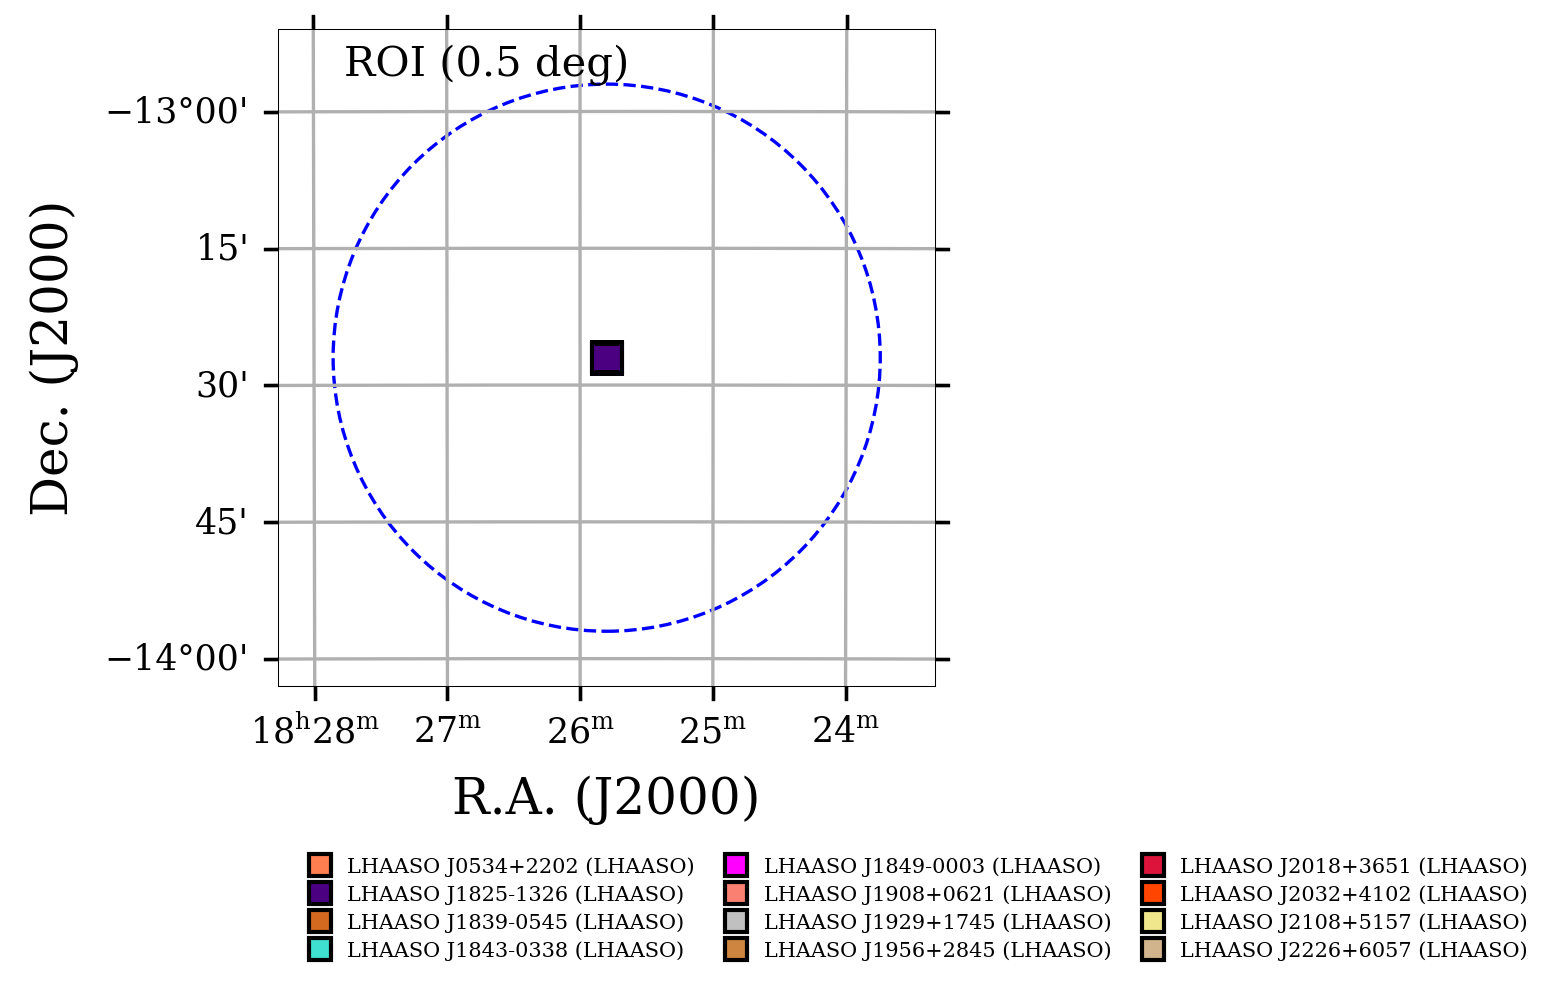

In [10]:
from feupy.sources import Sources
from feupy.catalog import SourceCatalogLHAASO
catalog = SourceCatalogLHAASO()

catalog.table

sources = Sources([source for source in catalog])
ref_markers = generate_catalog_markers(sources, marker_size=8)
ref_markers = {'LHAASO J0534+2202 (LHAASO)': {'label': 'LHAASO J0534+2202 (LHAASO)',
  'marker': 's',
  'color': 'coral',
  'markersize': 7.2},
 'LHAASO J1825-1326 (LHAASO)': {'label': 'LHAASO J1825-1326 (LHAASO)',
  'marker': 's',
  'color': 'indigo',
  'markersize': 7.2},
 'LHAASO J1839-0545 (LHAASO)': {'label': 'LHAASO J1839-0545 (LHAASO)',
  'marker': 's',
  'color': 'chocolate',
  'markersize': 7.2},
 'LHAASO J1843-0338 (LHAASO)': {'label': 'LHAASO J1843-0338 (LHAASO)',
  'marker': 's',
  'color': 'turquoise',
  'markersize': 7.2},
 'LHAASO J1849-0003 (LHAASO)': {'label': 'LHAASO J1849-0003 (LHAASO)',
  'marker': 's',
  'color': 'fuchsia',
  'markersize': 7.2},
 'LHAASO J1908+0621 (LHAASO)': {'label': 'LHAASO J1908+0621 (LHAASO)',
  'marker': 's',
  'color': 'salmon',
  'markersize': 7.2},
 'LHAASO J1929+1745 (LHAASO)': {'label': 'LHAASO J1929+1745 (LHAASO)',
  'marker': 's',
  'color': 'silver',
  'markersize': 7.2},
 'LHAASO J1956+2845 (LHAASO)': {'label': 'LHAASO J1956+2845 (LHAASO)',
  'marker': 's',
  'color': 'peru',
  'markersize': 7.2},
 'LHAASO J2018+3651 (LHAASO)': {'label': 'LHAASO J2018+3651 (LHAASO)',
  'marker': 's',
  'color': 'crimson',
  'markersize': 7.2},
 'LHAASO J2032+4102 (LHAASO)': {'label': 'LHAASO J2032+4102 (LHAASO)',
  'marker': 's',
  'color': 'orangered',
  'markersize': 7.2},
 'LHAASO J2108+5157 (LHAASO)': {'label': 'LHAASO J2108+5157 (LHAASO)',
  'marker': 's',
  'color': 'khaki',
  'markersize': 7.2},
 'LHAASO J2226+6057 (LHAASO)': {'label': 'LHAASO J2226+6057 (LHAASO)',
  'marker': 's',
  'color': 'tan',
  'markersize': 7.2}}


# Initialize the ROI Map Plotter
roi_plotter = ROIMapPlotter(center=target_position, radius=analysis_roi.config.roi.radius)

# Plot the ROI and save it to a file
roi_plotter.plot(sources=sources, file_path="roi_map.png", ref_markers=ref_markers)

## Generate Markers for Plotting
Create reference markers for the sources and datasets for visualization.


In [11]:
# Generate reference markers
ref_markers = generate_catalog_markers(sources, datasets, marker_size=8)
print("\nGenerated reference markers:")
print(ref_markers)



Generated reference markers:
{'LHAASO J0534+2202 (LHAASO)': {'label': 'LHAASO J0534+2202 (LHAASO)', 'marker': 's', 'color': 'red', 'markersize': 7.2}, 'LHAASO J1825-1326 (LHAASO)': {'label': 'LHAASO J1825-1326 (LHAASO)', 'marker': 's', 'color': 'tan', 'markersize': 7.2}, 'LHAASO J1839-0545 (LHAASO)': {'label': 'LHAASO J1839-0545 (LHAASO)', 'marker': 's', 'color': 'chartreuse', 'markersize': 7.2}, 'LHAASO J1843-0338 (LHAASO)': {'label': 'LHAASO J1843-0338 (LHAASO)', 'marker': 's', 'color': 'darkblue', 'markersize': 7.2}, 'LHAASO J1849-0003 (LHAASO)': {'label': 'LHAASO J1849-0003 (LHAASO)', 'marker': 's', 'color': 'maroon', 'markersize': 7.2}, 'LHAASO J1908+0621 (LHAASO)': {'label': 'LHAASO J1908+0621 (LHAASO)', 'marker': 's', 'color': 'cadetblue', 'markersize': 7.2}, 'LHAASO J1929+1745 (LHAASO)': {'label': 'LHAASO J1929+1745 (LHAASO)', 'marker': 's', 'color': 'pink', 'markersize': 7.2}, 'LHAASO J1956+2845 (LHAASO)': {'label': 'LHAASO J1956+2845 (LHAASO)', 'marker': 's', 'color': 'turqu

## Plot the ROI Map
Use the ROIMapPlotter to visualize the region of interest and save the plot as `roi_map.png`.


/home/phoenix/miniconda3/envs/gammapy-1.3/lib/python3.9/site-packages/regions/shapes/circle.py:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


<WCSAxes: >

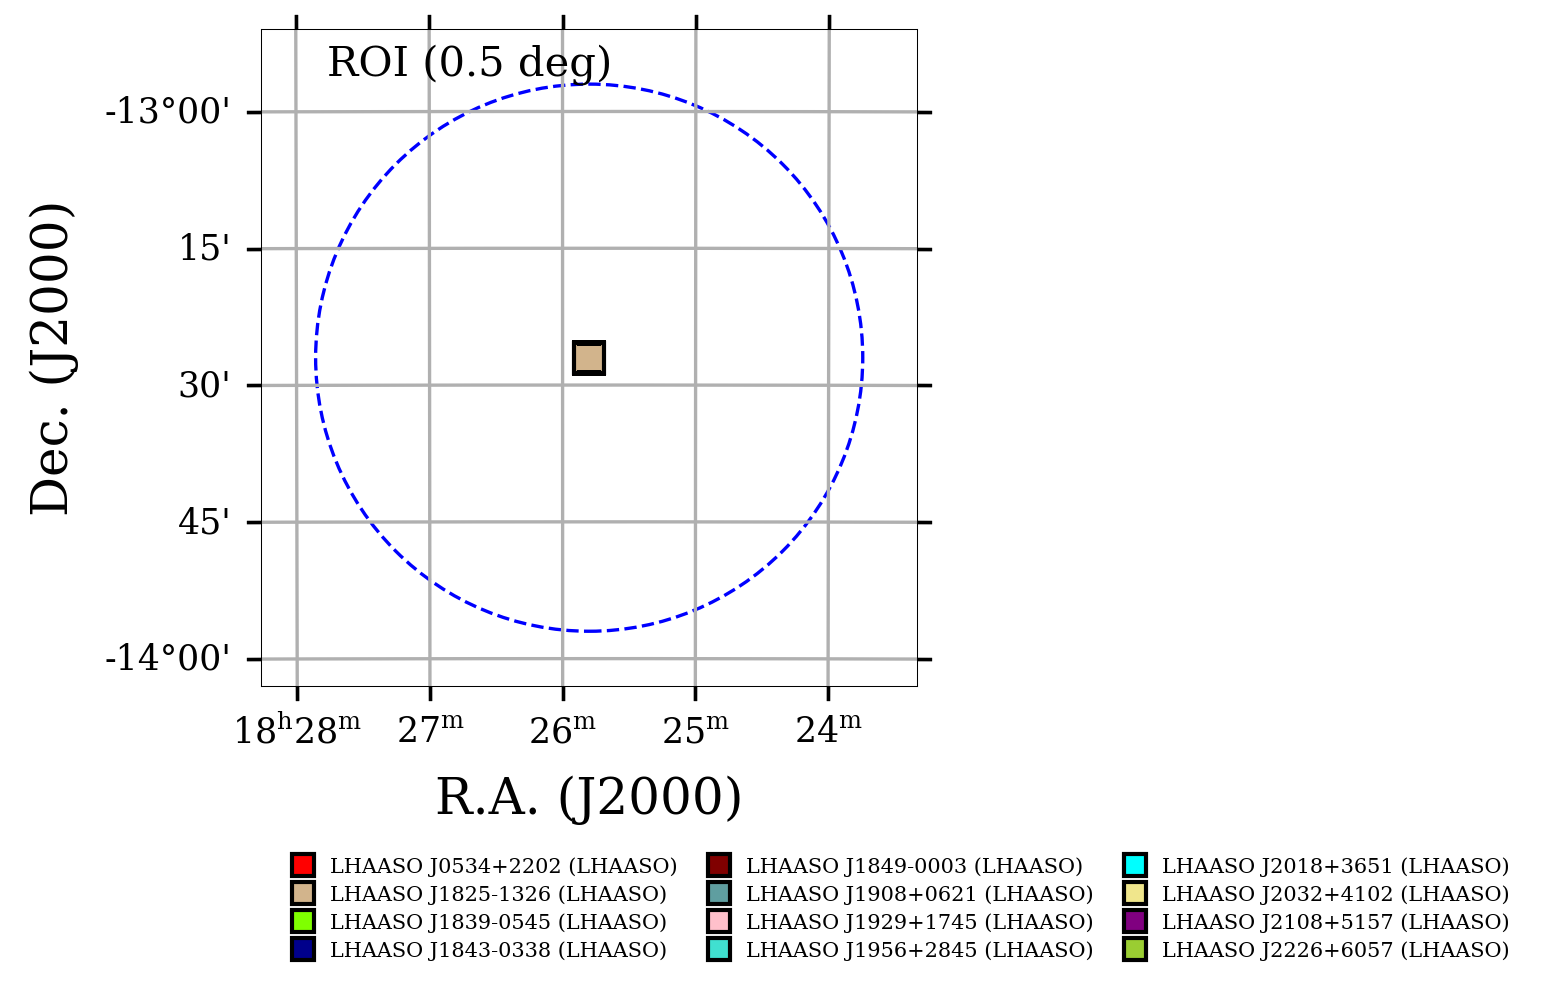

In [12]:
# Initialize the ROI Map Plotter
roi_plotter = ROIMapPlotter(center=target_position, radius=analysis_roi.config.roi.radius)

# Plot the ROI and save it to a file
roi_plotter.plot(sources=sources, file_path="roi_map.png", ref_markers=ref_markers)


## Plot the SED
Use the SEDPlotter to visualize the spectral energy distribution and save the plot as `sed.png`.



The minimum and maximum energies are equal, so a small range will be created around the value: 6.999999999999999 TeV

The minimum and maximum energies are equal, so a small range will be created around the value: 6.999999999999999 TeV

The minimum and maximum energies are equal, so a small range will be created around the value: 6.999999999999999 TeV

The minimum and maximum energies are equal, so a small range will be created around the value: 49.99999999999999 TeV

The minimum and maximum energies are equal, so a small range will be created around the value: 3.0000000000000004 TeV


<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='$\\rm {E^{2}\\,\\Phi(E)\\, [erg\\,s^{-1}\\,cm^{-2}}$]'>

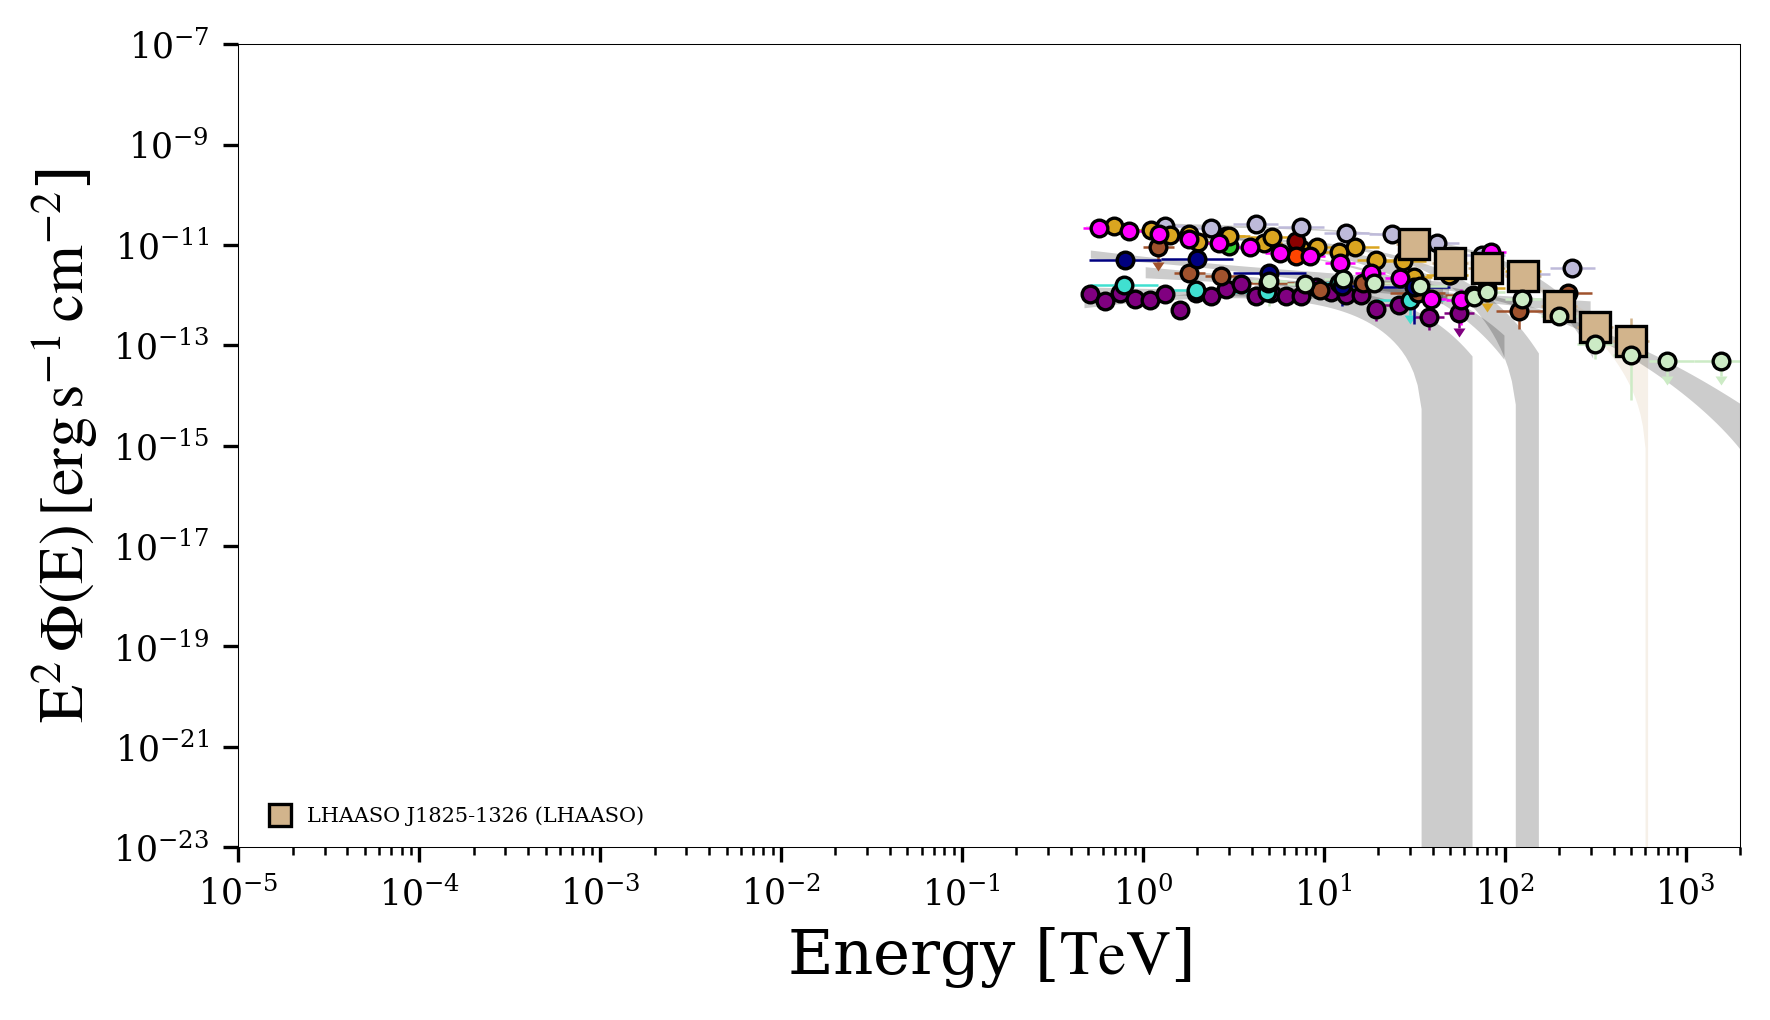

In [13]:
# Initialize the SED Plotter
sed_plotter = SEDPlotter(datasets=datasets)

# Plot the SED and save it to a file
sed_plotter.plot(file_path="sed.png", ref_markers=ref_markers)


## Additional Information
Display the datasets and source names in the ROI.


In [14]:
# Display datasets and sources
print("\nDatasets in the ROI:")
print(datasets.names)

print("\nSource names in the ROI:")
print(sources.names)



Datasets in the ROI:
['HESS J1826-130 (gamma-cat)', 'HESS J1825-137 (gamma-cat)', 'HESS J1826-130 (hgps)', '2HWC J1825-134 (2hwc) (point)', '2HWC J1825-134 (2hwc) (extended)', '3HWC J1825-134 (3hwc)', '1LHAASO J1825-1337u (1LHAASO) (KM2A)', '1LHAASO J1825-1337u (1LHAASO) (WCDA)', 'eHWC J1825-134 (ehwc)', 'HAWC J1825-138 (hwc-2021ApJ)', 'HAWC J1825-134 (hwc-2021ApJ)', 'HESS J1825-137 (hess-2019A&A)', 'VER J1825-138 (2020APh)', 'LHAASO J1825-1326 (LHAASO)', '1LHAASO J1825-1337u (LHAASO-2024icrc)']

Source names in the ROI:
['LHAASO J0534+2202', 'LHAASO J1825-1326', 'LHAASO J1839-0545', 'LHAASO J1843-0338', 'LHAASO J1849-0003', 'LHAASO J1908+0621', 'LHAASO J1929+1745', 'LHAASO J1956+2845', 'LHAASO J2018+3651', 'LHAASO J2032+4102', 'LHAASO J2108+5157', 'LHAASO J2226+6057']
